In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import tensorflow as tf
#not needed, already normalzied from 0-255
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Dataset Reminder: 
0 is female classification, 1 is male classification

In [34]:
myModel = keras.models.load_model('Best_Gender_Model.hp5y')

In [35]:
wikiData = pd.read_csv('Datasets/wiki5.csv')
wikiData.head()

,Unnamed: 0,gender,age,px0,px1,px2,px3,px4,px5,px6,...,px9990,px9991,px9992,px9993,px9994,px9995,px9996,px9997,px9998,px9999
0,0,1,36,174,173,172,173,174,171,169,...,35,30,29,28,30,32,38,32,31,29
1,1,1,41,225,189,163,177,177,137,162,...,17,8,38,39,35,9,14,49,48,25
2,2,1,30,81,67,88,36,67,105,63,...,137,130,131,135,138,137,132,128,127,128
3,3,1,24,193,194,194,194,190,189,189,...,216,216,218,218,218,217,217,217,219,219
4,4,1,33,41,35,28,26,22,21,17,...,122,112,114,114,110,117,120,126,127,127


In [36]:
faceTest = pd.read_csv('images.csv')
faceTest.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,164,165,165,166,167,167,168,168,169,...,38,34,30,29,32,35,32,31,31,32


In [37]:
#preprocess wiki
faceX = faceTest.iloc[:,0:10000].values
faceX_shaped_pic = faceX.reshape(100,100)
faceX_shaped = faceX_shaped_pic.reshape(-1, 100, 100, 1)
faceX_reg = faceX_shaped/255
X = wikiData.iloc[:, 2:10002].values
print(X.shape)
y = wikiData.iloc[:, 1].values
X = X.reshape(wikiData.shape[0],100,100)
X_shaped = X.reshape(-1, 100, 100, 1)
X_reg = X_shaped/255
y_one_hot = to_categorical(y)
print(X_reg.shape,y.shape,y_one_hot.shape)
print (faceX_shaped.shape)

(3209, 10000)
(3209, 100, 100, 1) (3209,) (3209, 2)
(1, 100, 100, 1)


### Evaluating our Model

In [42]:
test_eval4 = myModel.evaluate(X_reg, y_one_hot, verbose=1)
print("The test loss is: %f and the testing accuracy is: %f " % (test_eval4[0],test_eval4[1]))


myPredictions = myModel.predict(X_reg)
myPredicted_classes = np.argmax(np.round(myPredictions),axis=1)
myPredicted_classes.shape, y.shape
myCorrect = np.where(myPredicted_classes==y)
myIncorrect = np.where(myPredicted_classes!=y)
print("Correct guesses %d \n Incorrect guesses %d"% (len(myCorrect[0]), len(myIncorrect[0])))

3209/3209 [==============================] - 13s 4ms/step
The test loss is: 0.210779 and the testing accuracy is: 0.916797 
Correct guesses 2942 
 Incorrect guesses 267


### Guess on non-dataset face (ie. Me)

[1]
(100, 100)


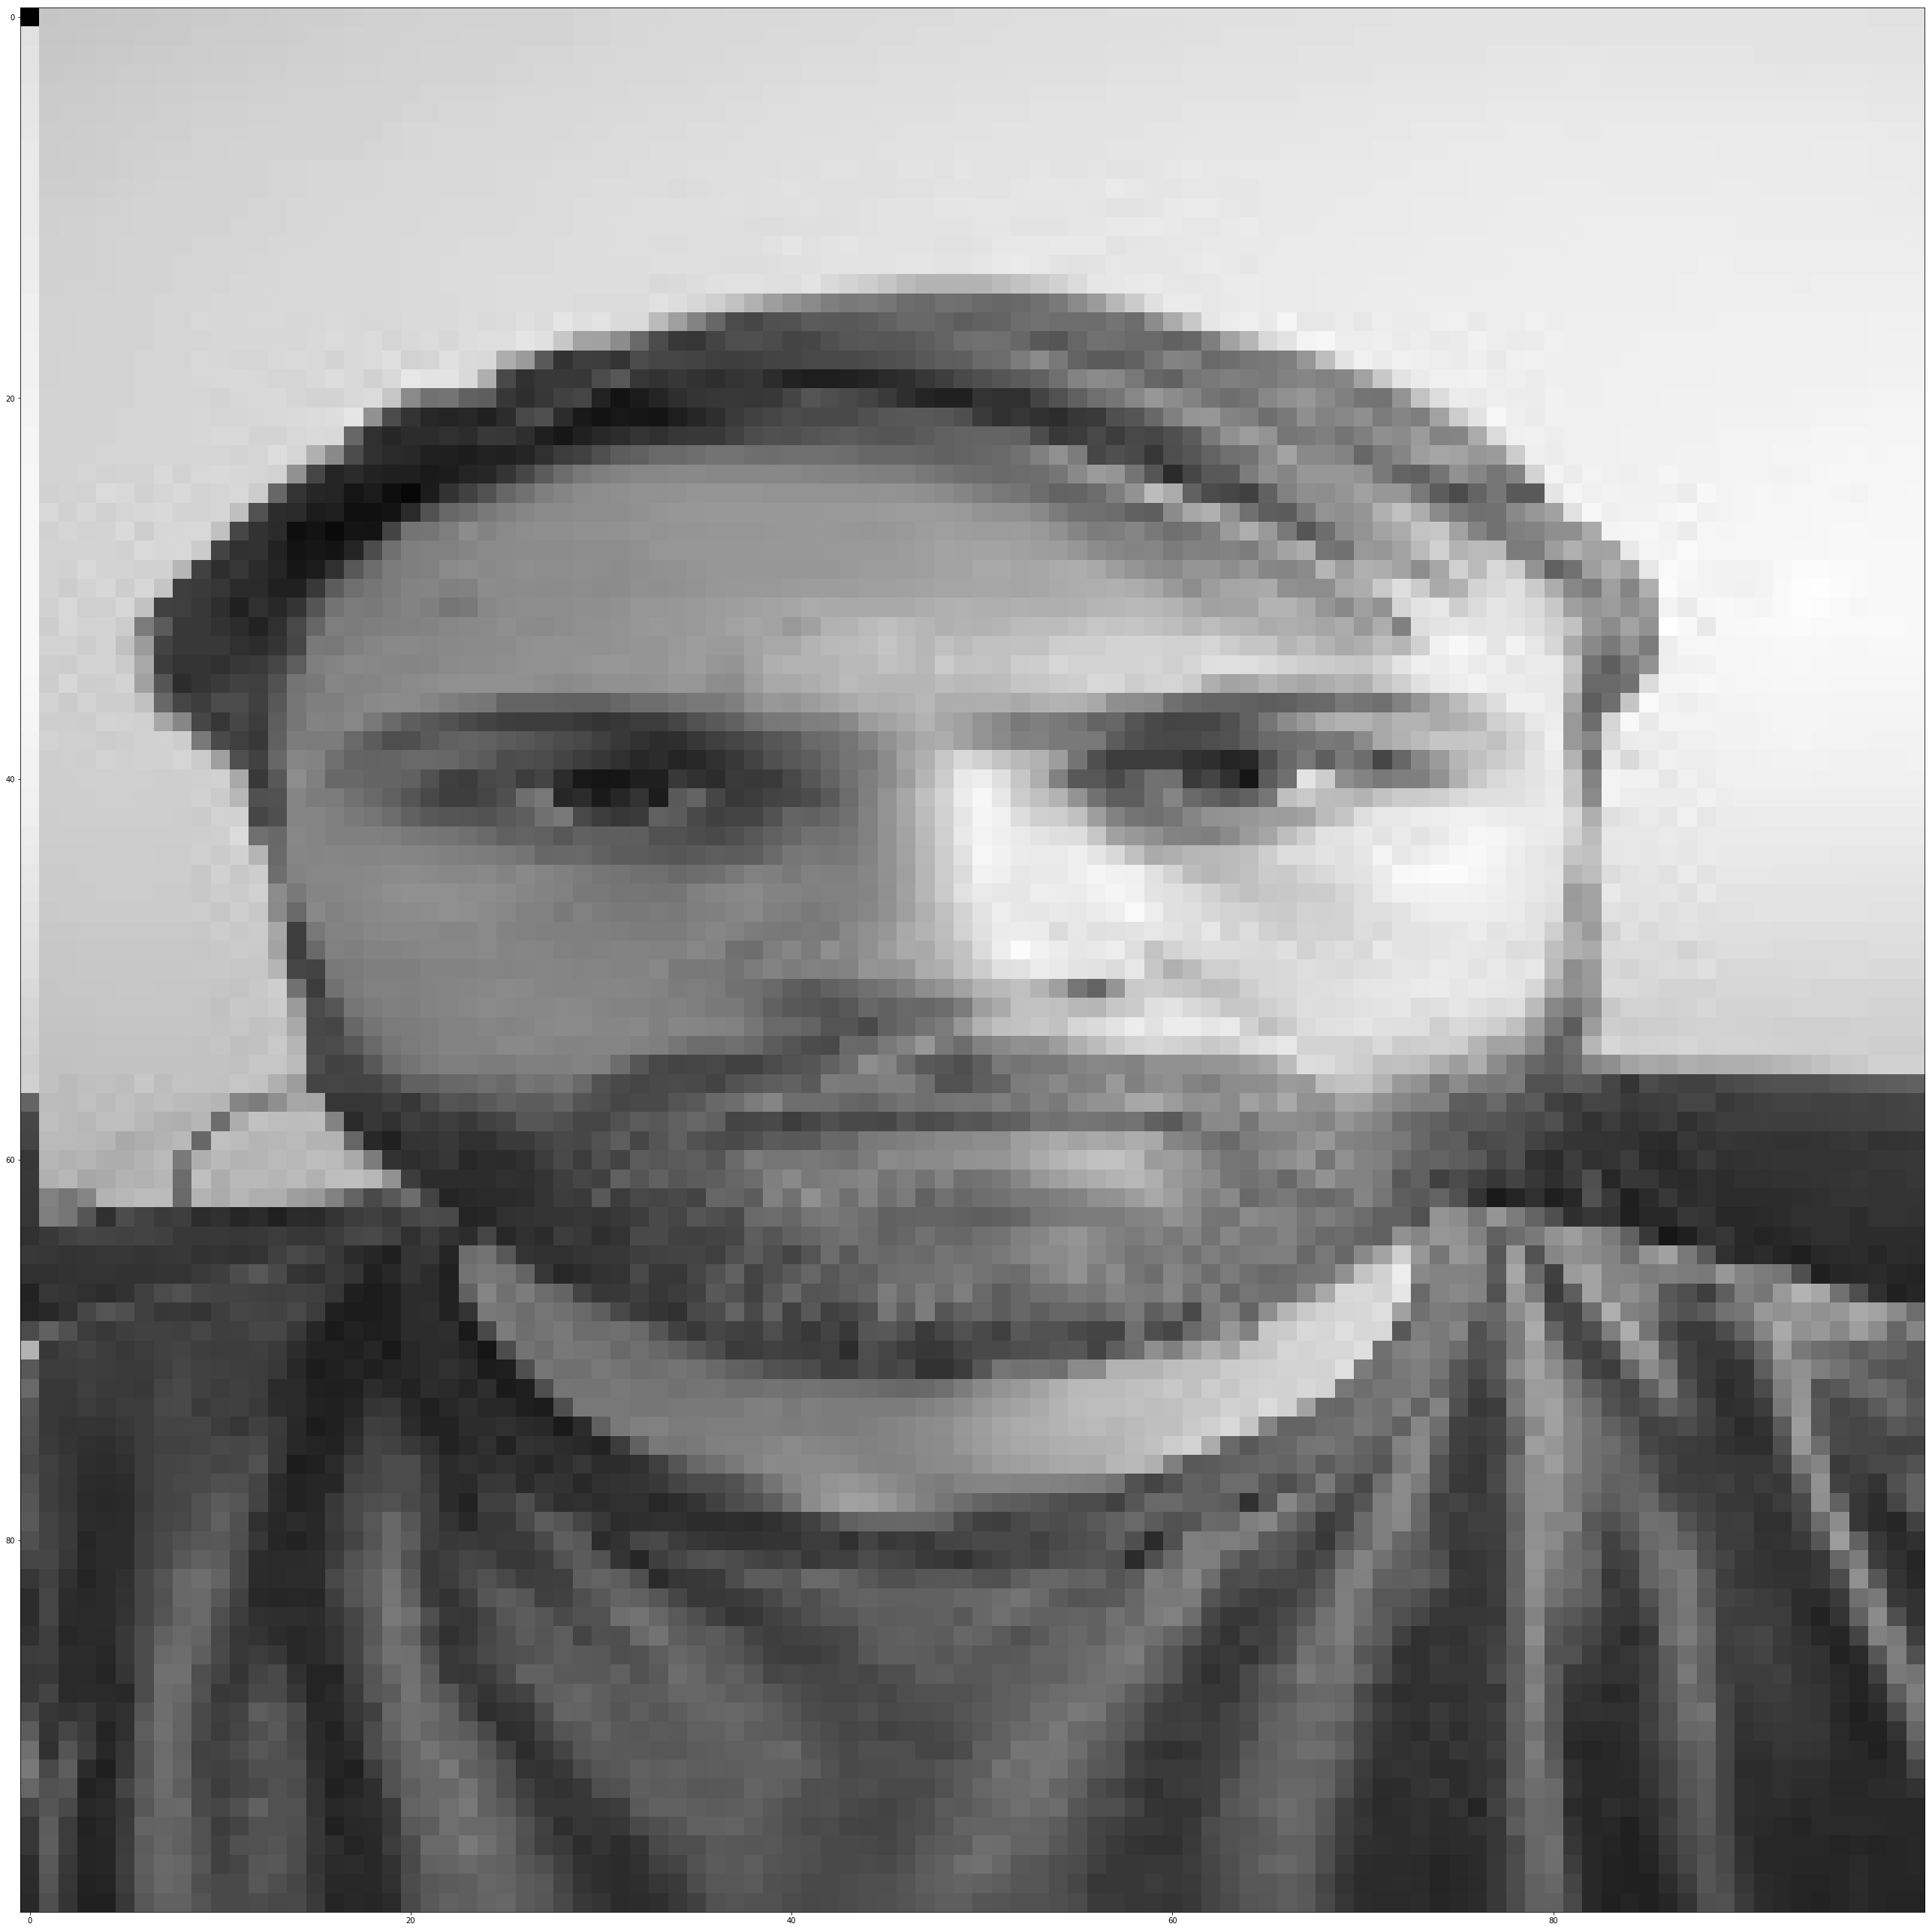

In [44]:
facePredict = myModel.predict(faceX_shaped)
facePredicted_classes = np.argmax(np.round(facePredict),axis=1)
print(facePredicted_classes)
plt.figure(figsize=[100,100])
# Display the first image in training data
plt.subplot(121)
print(faceX_shaped_pic.shape)
plt.imshow(faceX_shaped_pic, cmap='gray')
#this makes my head look wide, It's glorious

#### The guess was correct! It guessed male for my face.

In [45]:
print(myIncorrect)
print (VGGIncorrect)

(array([  22,   29,   31,   47,   48,   49,   53,   54,   55,   61,   70,
         95,  135,  138,  178,  179,  202,  205,  220,  239,  249,  252,
        263,  265,  275,  284,  289,  290,  313,  321,  359,  366,  379,
        380,  382,  411,  441,  454,  461,  479,  491,  520,  524,  528,
        548,  568,  581,  589,  590,  595,  607,  608,  615,  619,  622,
        633,  664,  670,  686,  703,  716,  739,  783,  785,  793,  798,
        823,  840,  842,  874,  884,  890,  895,  898,  904,  915,  918,
        951,  955,  968,  970,  976,  979,  985, 1006, 1018, 1045, 1057,
       1059, 1066, 1089, 1093, 1111, 1119, 1129, 1139, 1153, 1155, 1165,
       1168, 1176, 1188, 1216, 1228, 1244, 1253, 1332, 1380, 1403, 1440,
       1443, 1449, 1457, 1458, 1461, 1470, 1478, 1487, 1498, 1501, 1515,
       1532, 1533, 1547, 1552, 1570, 1595, 1622, 1631, 1644, 1649, 1659,
       1679, 1686, 1698, 1758, 1761, 1780, 1786, 1822, 1823, 1846, 1859,
       1864, 1881, 1883, 1885, 1929, 1935, 1940, 1

### One of the incorrect guesses

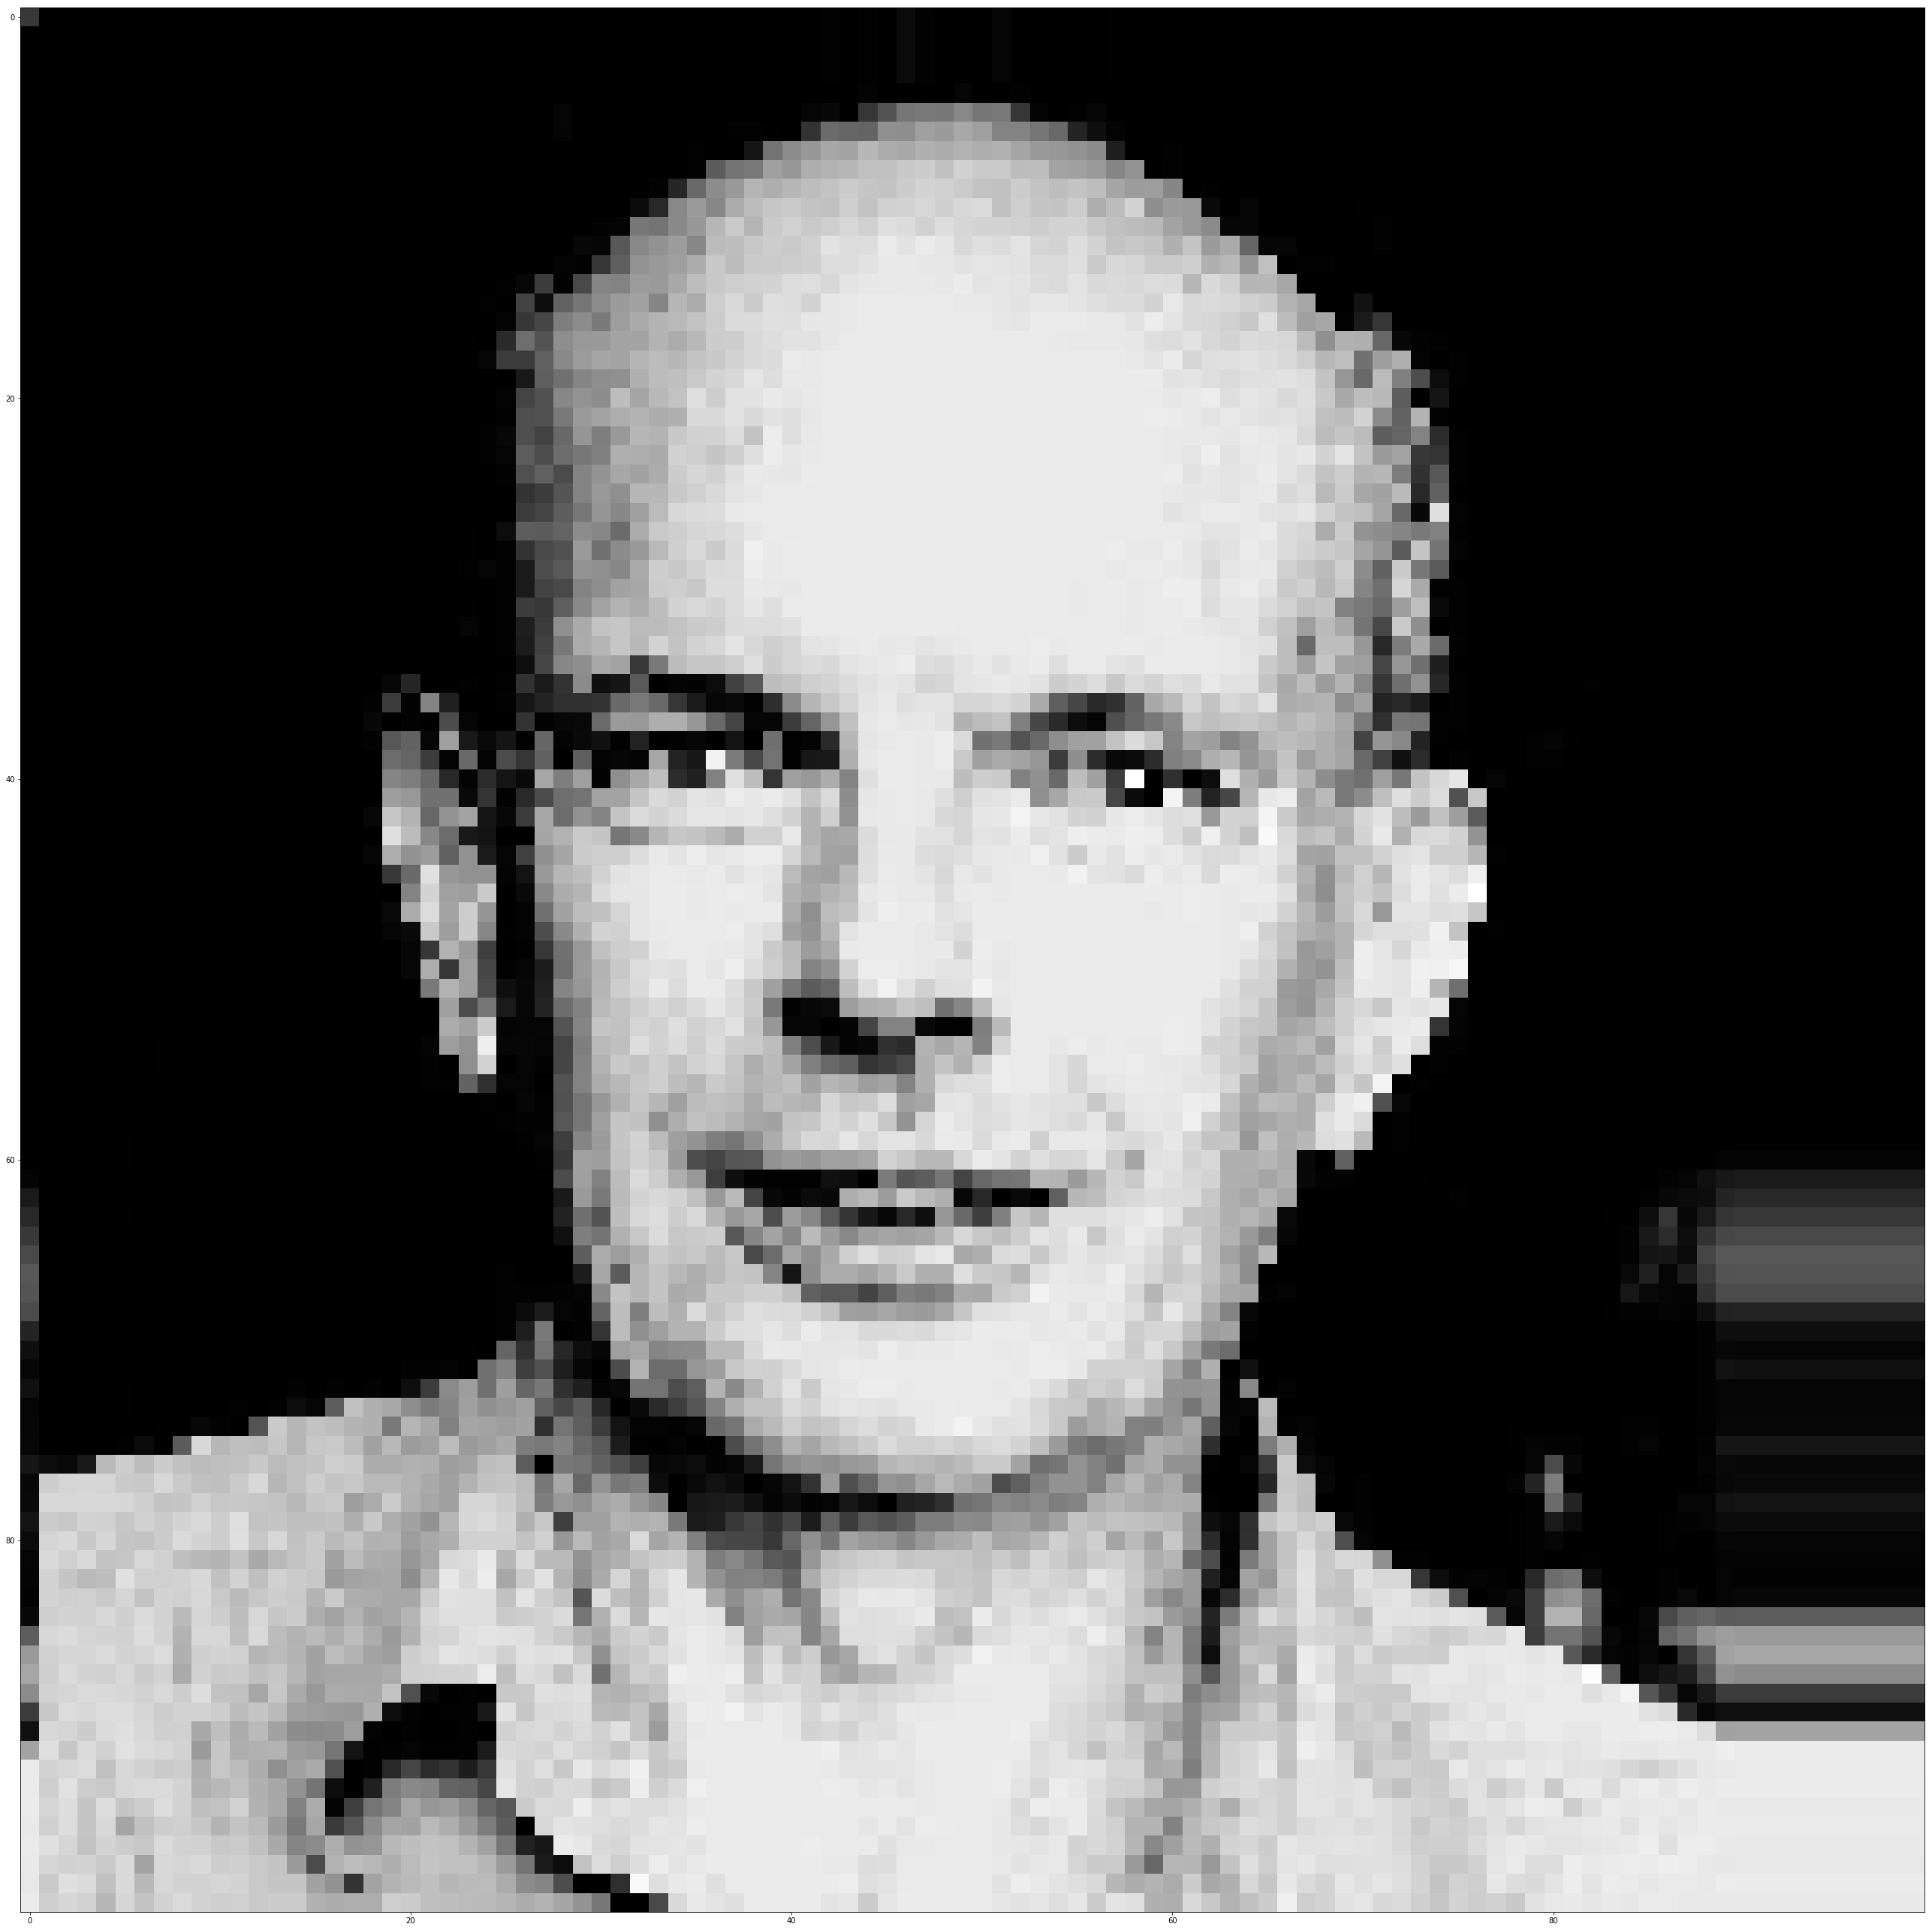

In [46]:
plt.figure(figsize=[100,100])
# get some random picture
rand = random.randint(0,(len(myIncorrect)-1))
randIncorrect = myIncorrect[0][rand]
#Display an image in training data
plt.subplot(121)
plt.imshow(X[randIncorrect,:,:], cmap='gray')